In [1]:
%run lgs00_general_functions.ipynb

In [2]:
start_pymol()

In [3]:
ascii_letters = 'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'
aa3 = "ALA CYS ASP GLU PHE GLY HIS ILE LYS LEU MET ASN PRO GLN ARG SER THR VAL TRP TYR XXX CR2 GYS".split()

def get_minimal_distances_in_a_complex(chains):
    distances = []
    chains = [chain for chain in chains if chain.id in ascii_letters]
    for chain1 in chains:
        for chain2 in chains:
            distances.append(calc_dist_matrix(chain1, chain2))
    return np.amin(np.array(distances), axis=0)

def calc_dist_matrix(chain1, chain2, stripping=True, mode='min'):
    """Returns a matrix of C-alpha distances between two chains"""
    chain1_residues = rstrip_non_aa_residues(list(chain1.get_residues()))
    chain2_residues = rstrip_non_aa_residues(list(chain2.get_residues()))
    answer = np.zeros((len(chain1_residues), len(chain2_residues)), np.float)
    for row, residue_one in enumerate(chain1_residues):
        for col, residue_two in enumerate(chain2_residues) :
            answer[row, col] = get_distance_between_residues(residue_one, residue_two, mode=mode)
    return answer

def get_distance_between_atoms(atom1, atom2):
    diff_vector  = atom1.coord - atom2.coord
    return np.sqrt(np.sum(diff_vector * diff_vector))


def get_distance_between_residues(residue_one, residue_two, mode='min'):
    assert mode in ['CA', 'min']
    if mode == 'CA':
        diff_vector  = residue_one["CA"].coord - residue_two["CA"].coord
        return np.sqrt(np.sum(diff_vector * diff_vector))
    if mode == 'min':
        distances = []
        for atom1 in residue_one.get_atom():
            for atom2 in residue_two.get_atom():
                distances.append(get_distance_between_atoms(atom1, atom2))
        return min(distances)
    
def rstrip_non_aa_residues(residues):
    for index, residue in enumerate(residues):
        if residue.resname not in aa3:
#             print(residue.resname)
            break
            
    residues = residues[:index]
    return residues

In [4]:
# Positions of only those residues included in the PDB structure
# Numbering starts from Met=0; +=1 for PDB numbering

av_positions = list(range(2,65)) + list(range(67,232))
amac_positions = list(range(-2,65)) + list(range(67,227))
cgre_positions = list(range(4,68)) + list(range(70,235))
pplu_positions = list(range(2,56)) + list(range(58,185)) + list(range(187,218))

C:\Users\lgonzale\Anaconda3\lib\site-packages\Bio\PDB\Residue.py:106: BiopythonDeprecationWarning: `get_atom` has been deprecated and we intend to remove it in a future release of Biopython. Please use `get_atoms` instead.
  BiopythonDeprecationWarning,
C:\Users\lgonzale\Anaconda3\lib\site-packages\Bio\PDB\Residue.py:106: BiopythonDeprecationWarning: `get_atom` has been deprecated and we intend to remove it in a future release of Biopython. Please use `get_atoms` instead.
  BiopythonDeprecationWarning,
C:\Users\lgonzale\Anaconda3\lib\site-packages\Bio\PDB\Residue.py:106: BiopythonDeprecationWarning: `get_atom` has been deprecated and we intend to remove it in a future release of Biopython. Please use `get_atoms` instead.
  BiopythonDeprecationWarning,
C:\Users\lgonzale\Anaconda3\lib\site-packages\Bio\PDB\Residue.py:106: BiopythonDeprecationWarning: `get_atom` has been deprecated and we intend to remove it in a future release of Biopython. Please use `get_atoms` instead.
  BiopythonDepr

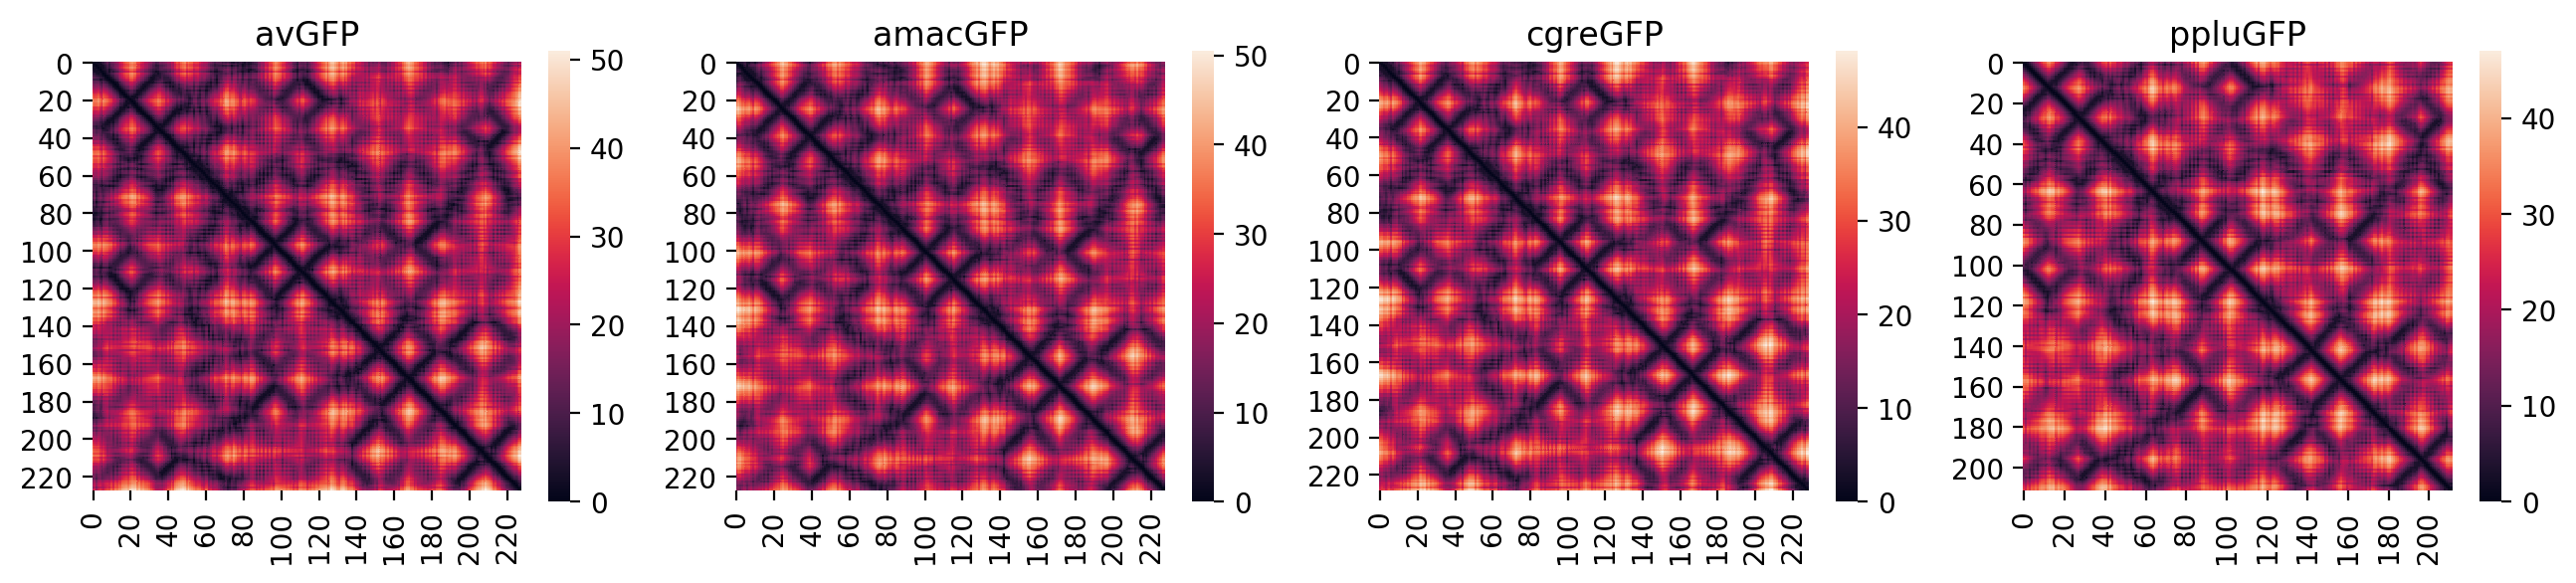

In [5]:
axes = subplots(nplots=4, nplots_per_row=4)
for ax,gene in zip(axes, ['av', 'amac', 'cgre', 'pplu']):
    pdb_file = pdb[gene]
    structure = Bio.PDB.PDBParser().get_structure(id=gene, file=pdb_file)
    model = structure[0]
    chain1 = [c for c in list(model.get_chains())][0]
    df = get_minimal_distances_in_a_complex([chain1])
    
    plt.sca(ax)
    sns.heatmap(df, square=True, cbar_kws={'shrink':0.75}, yticklabels=20, xticklabels=20)
    plt.title(gene+'GFP')
    
#     df = pd.DataFrame(df)
#     df.index = eval(gene+'_positions')
#     df.columns = eval(gene+'_positions')
    
#     if gene=='amac': #remove His-tag
#         for x in [-2,-1,0]:
#             del df[x]
#             df.drop(x, inplace=True)
            
#     df.to_csv(gene+'GFP_minimal_distances_between_aa.csv')